In [2]:
library(plyr)
library(dplyr)
library(ggplot2)
library(ggforce)
library(svglite)
library(extrafont)
library(gridExtra)
library(grid)
library(cowplot)
library(ggrepel)
library(stringr)

# Simulations

In [6]:
datans <- read.csv("logs_4ed/4ed_timeonair_ns.csv", sep = ",") %>% group_by(policy) %>% mutate(relstart = timestamp)

head(datans)
options(repr.plot.width=30, repr.plot.height=20)


DR,timestamp,threshold,event,device,nb_ED,seed,objSize,distance,fport,policy,relstart
<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
ALL,12.42701,2000,TX,0110110|0000000000000011101001000,4,1,2000,0,28,BASELINE,12.42701
ALL,17.30848,2000,TX,0110110|0000000000000011101001001,4,1,2000,0,28,BASELINE,17.30848
ALL,22.55091,2000,TX,0110110|0000000000000011101001010,4,1,2000,0,28,BASELINE,22.55091
ALL,27.34458,2000,TX,0110110|0000000000000011101001011,4,1,2000,0,28,BASELINE,27.34458
ALL,72.42701,2000,TX,0110110|0000000000000011101001000,4,1,2000,0,28,BASELINE,72.42701
ALL,77.30848,2000,TX,0110110|0000000000000011101001001,4,1,2000,0,28,BASELINE,77.30848


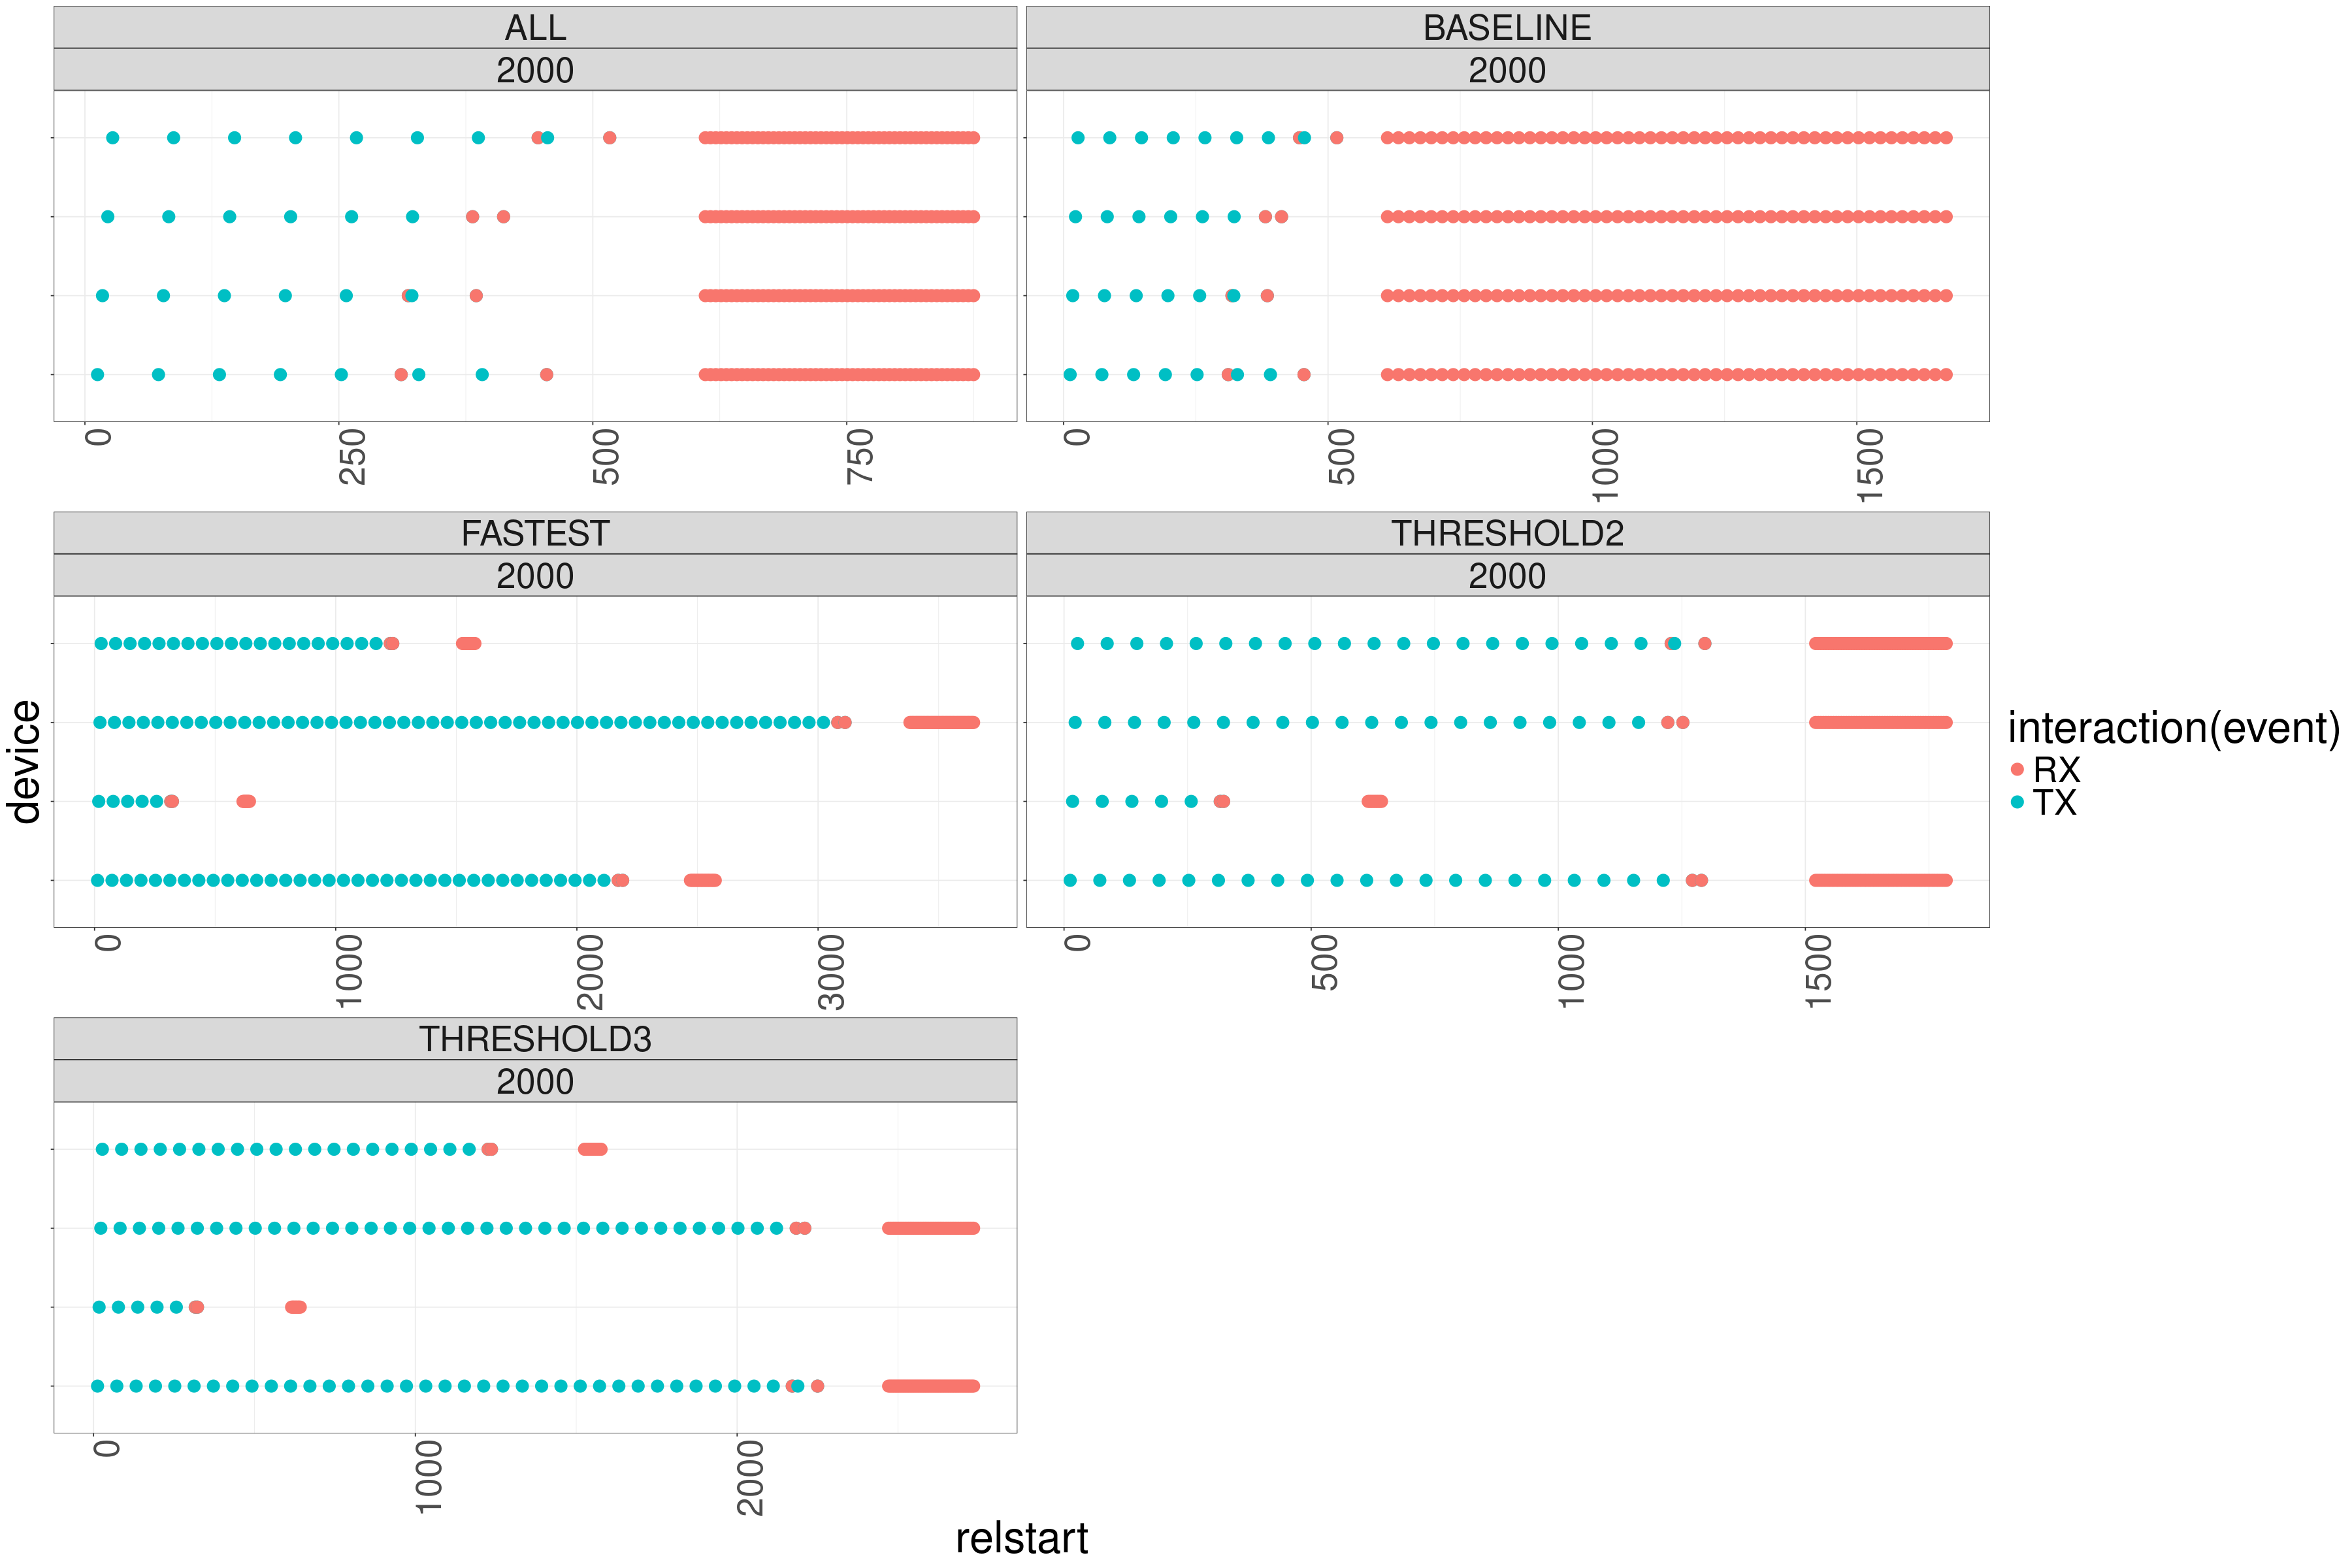

In [8]:
ggplot() + 
    geom_point(data=datans, aes(x=relstart, y=device, color=interaction(event)), size=5,alpha=1)+
    facet_wrap(~policy+threshold,scales="free", ncol=2)+
    theme_bw() +
    theme( text = element_text(size = 40), axis.text.y=element_blank(), axis.text.x = element_text(angle = 90, hjust = 1))


`summarise()` has grouped output by 'policy', 'device'. You can override using
the `.groups` argument.


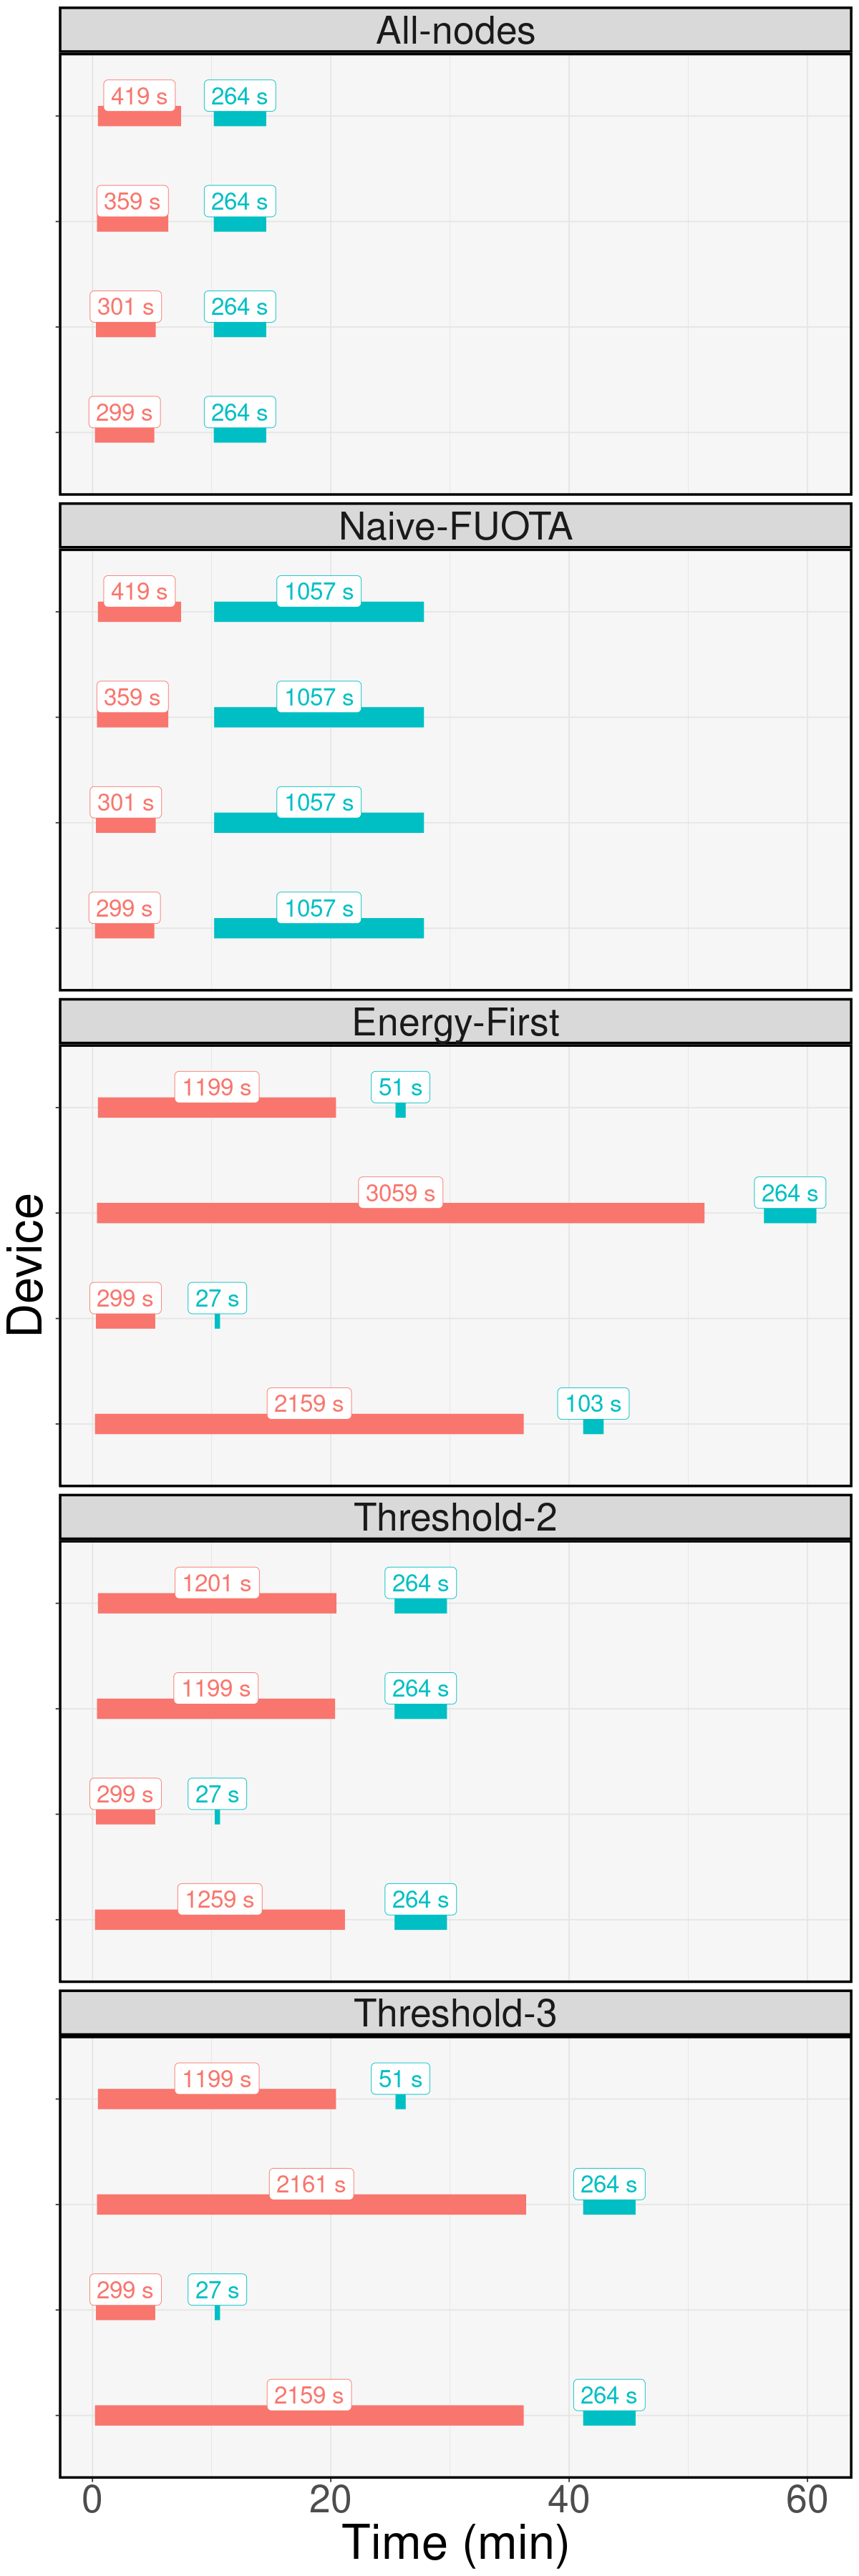

In [10]:
names <- c(
                    `ALL` = "All-nodes",
                    `BASELINE` = "Naive-FUOTA",
                    `FASTEST` = "Energy-First",
                    `THRESHOLD2` = "Threshold-2",
                    `THRESHOLD3` = "Threshold-3"
            )

datagant <- datans %>% filter(fport==28 | fport==200) %>% group_by(policy, device, fport) %>% summarize(start=min(timestamp), end=max(timestamp))
options(repr.plot.width=10, repr.plot.height=30)
p <- ggplot(datagant, aes(x=start/60, xend=end/60, y=device, color=factor(fport))) +
  theme_bw()+ #use ggplot theme with black gridlines and white background
  geom_segment(size=8) + #increase line width of segments in the chart
  geom_label(aes(label=paste(round(end-start),"s"), (start + end)/2/60),vjust=-0.15, size=7) +
  facet_wrap(~policy, ncol=1, labeller = as_labeller(names))+
  labs(x='Time (min)', y='Device')+
  theme( text = element_text(size = 40),
        axis.text.y=element_blank(),
        legend.position="None",
         panel.border = element_rect(color = "black", fill = NA, size = 2),
         panel.grid.major = element_line(colour = "grey90"),
         panel.grid.minor = element_line(colour = "grey90"),
         panel.background = element_rect(fill = "#EEEEEE88", colour = NA),
         strip.background = element_rect(color = "black", size = 2))
p
ggsave("4_nodes_policy_dur.pdf", plot=p, width=15, height=25)
embed_fonts("4_nodes_policy_dur.pdf")


# Real experiments

[1] "Comparison FASTEST"


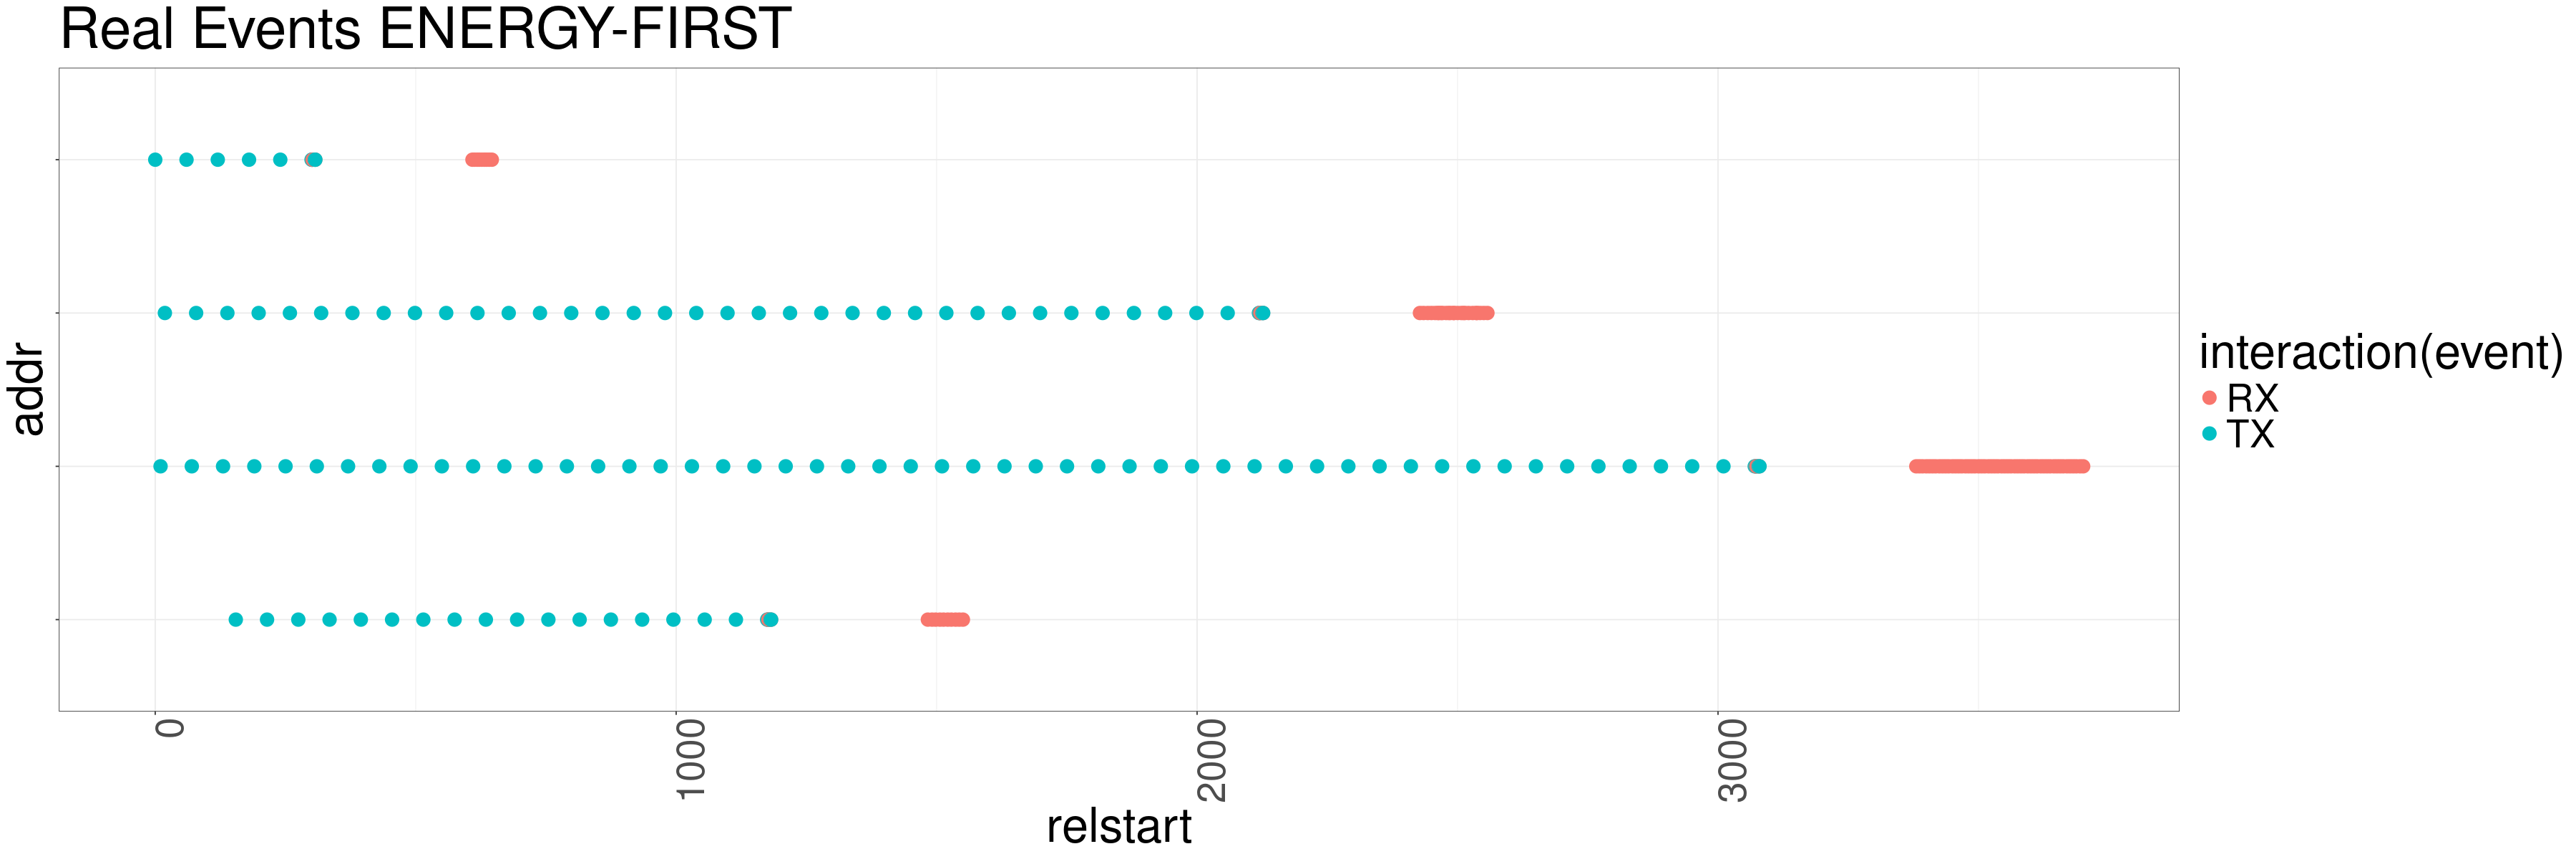

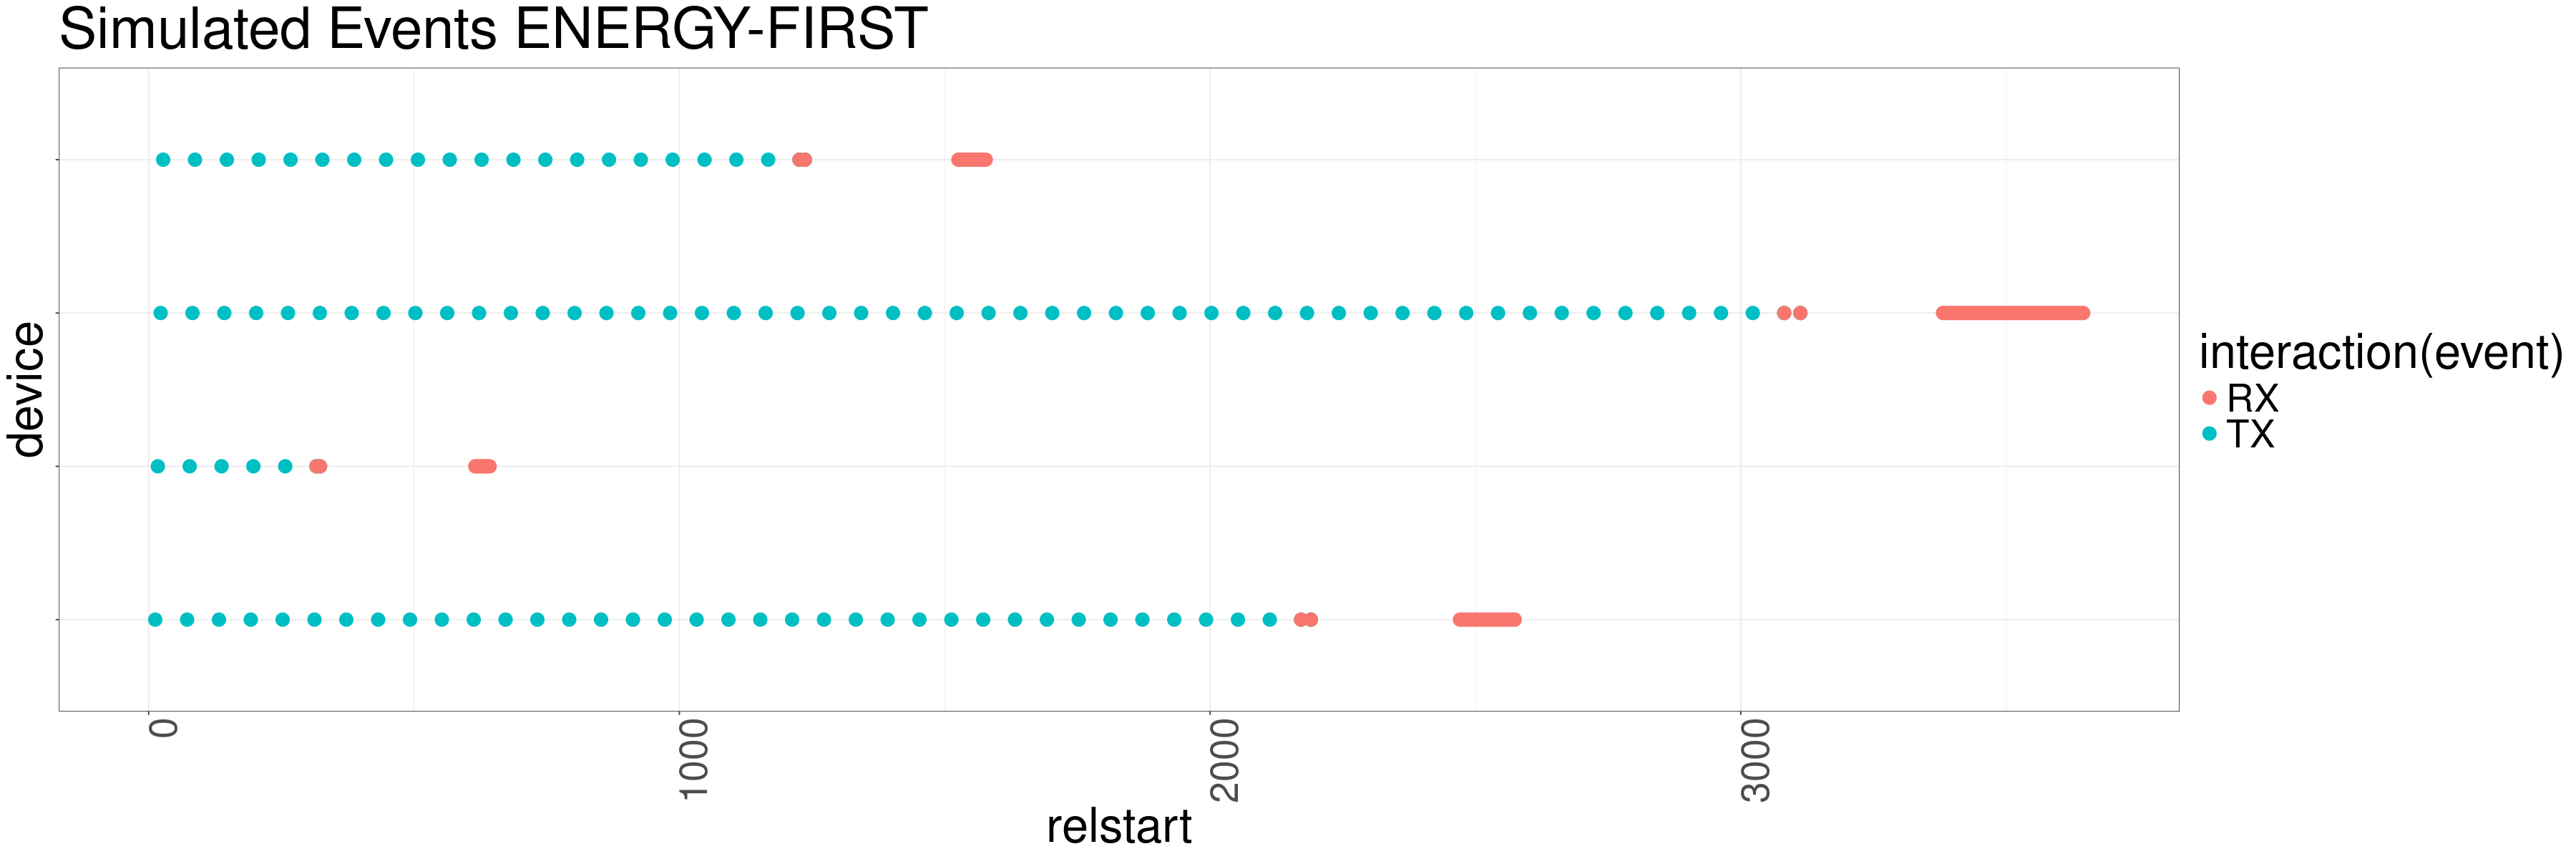

In [39]:
datareal <- read.csv("logs_4ed/4ed_timeonair_real_best.csv", sep = ",") %>% mutate(relstart = end-min(start))

print("Comparison FASTEST")

options(repr.plot.width=30, repr.plot.height=10)

ggplot() + 
    geom_point(data=datareal, aes(x=relstart, y=addr, color=interaction(event)), size=5,alpha=1)+
    theme_bw() +
    theme( text = element_text(size = 40), axis.text.x = element_text(angle = 90, hjust = 1),
         axis.text.y=element_blank())+ 
    ggtitle("Real Events ENERGY-FIRST") 

datans <- read.csv("logs_4ed/4ed_timeonair_ns.csv", sep = ",") %>% filter(policy=="FASTEST") %>% group_by(DR) %>% mutate(relstart = timestamp)
options(repr.plot.width=30, repr.plot.height=10)

ggplot() + 
    geom_point(data=datans, aes(x=relstart, y=device, color=interaction(event)), size=5,alpha=1)+
    theme_bw() +
    theme( text = element_text(size = 40), axis.text.x = element_text(angle = 90, hjust = 1),
         axis.text.y=element_blank())+ 
    ggtitle("Simulated Events ENERGY-FIRST") 



[1] "Comparison THRESH2"


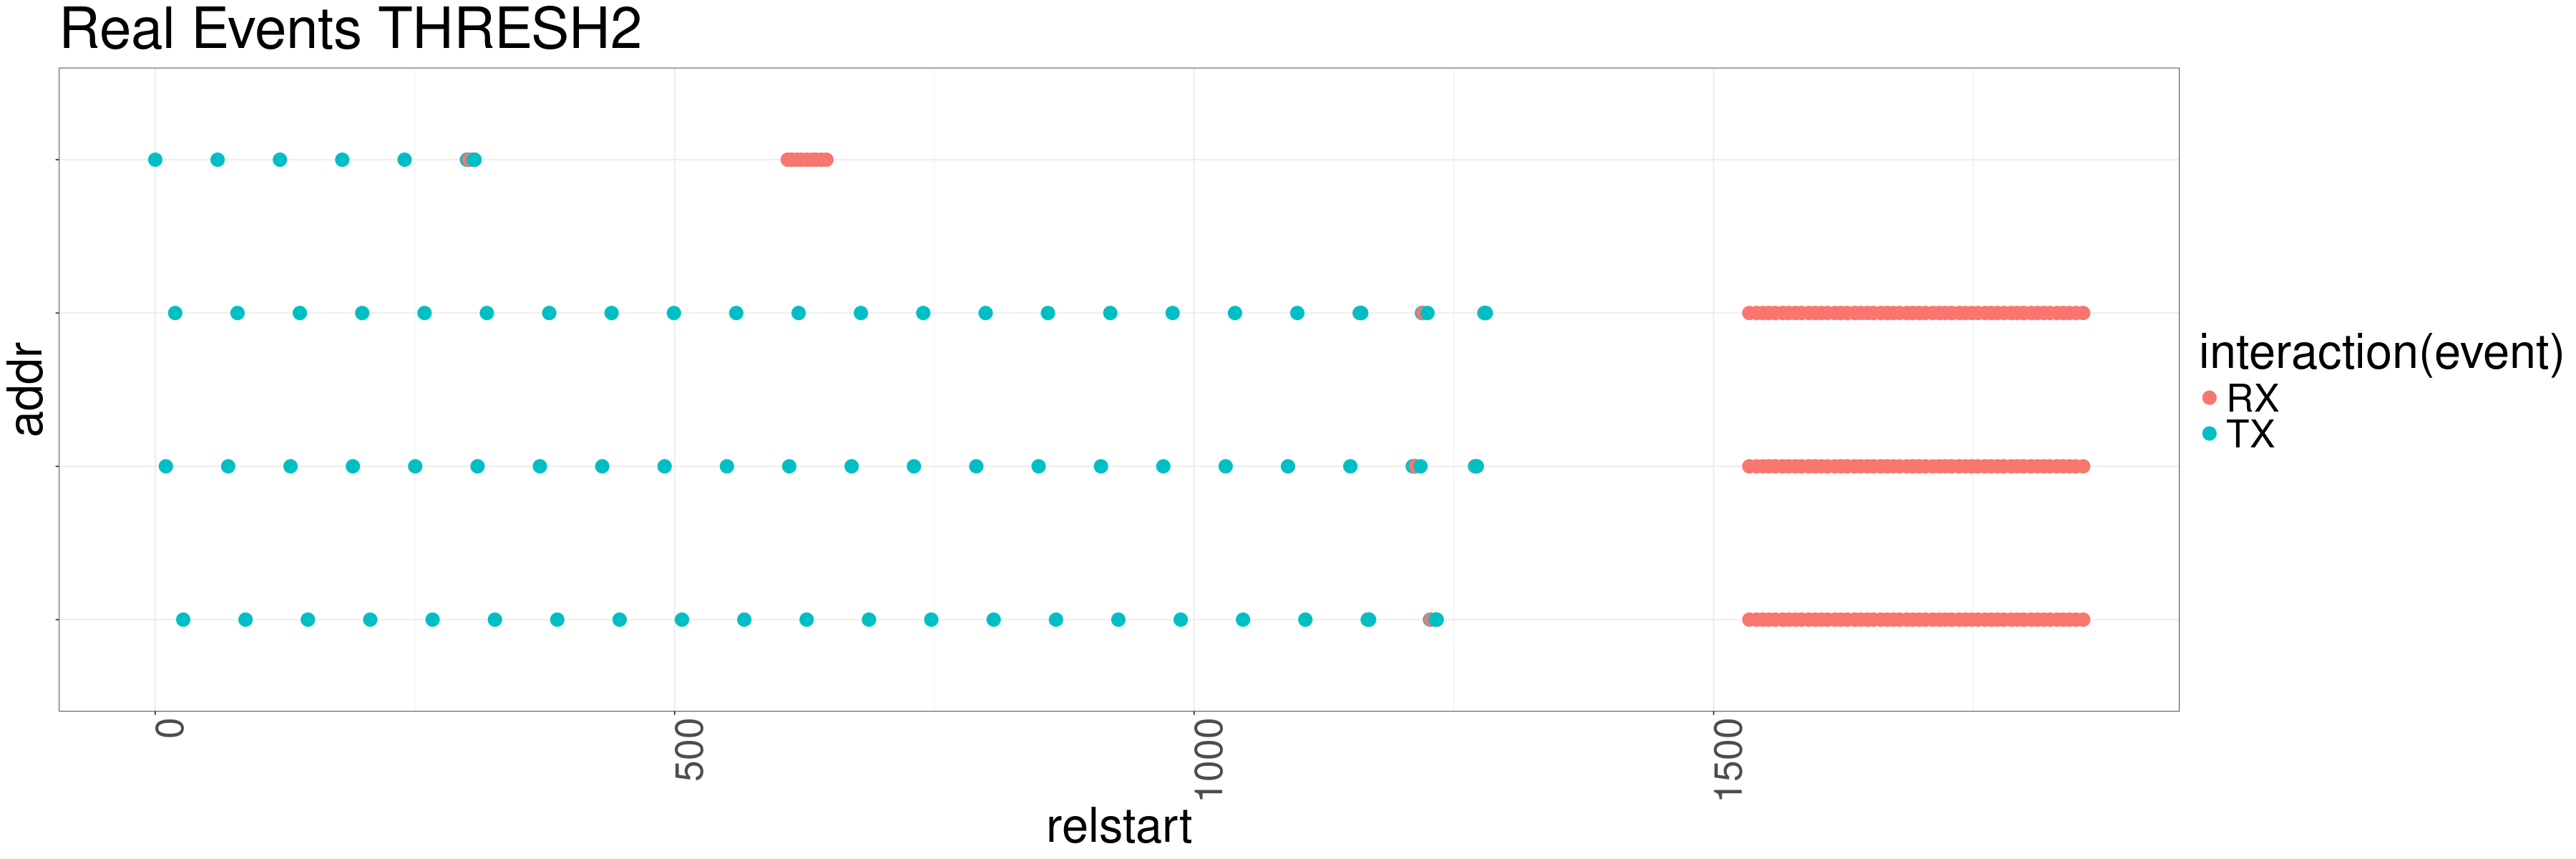

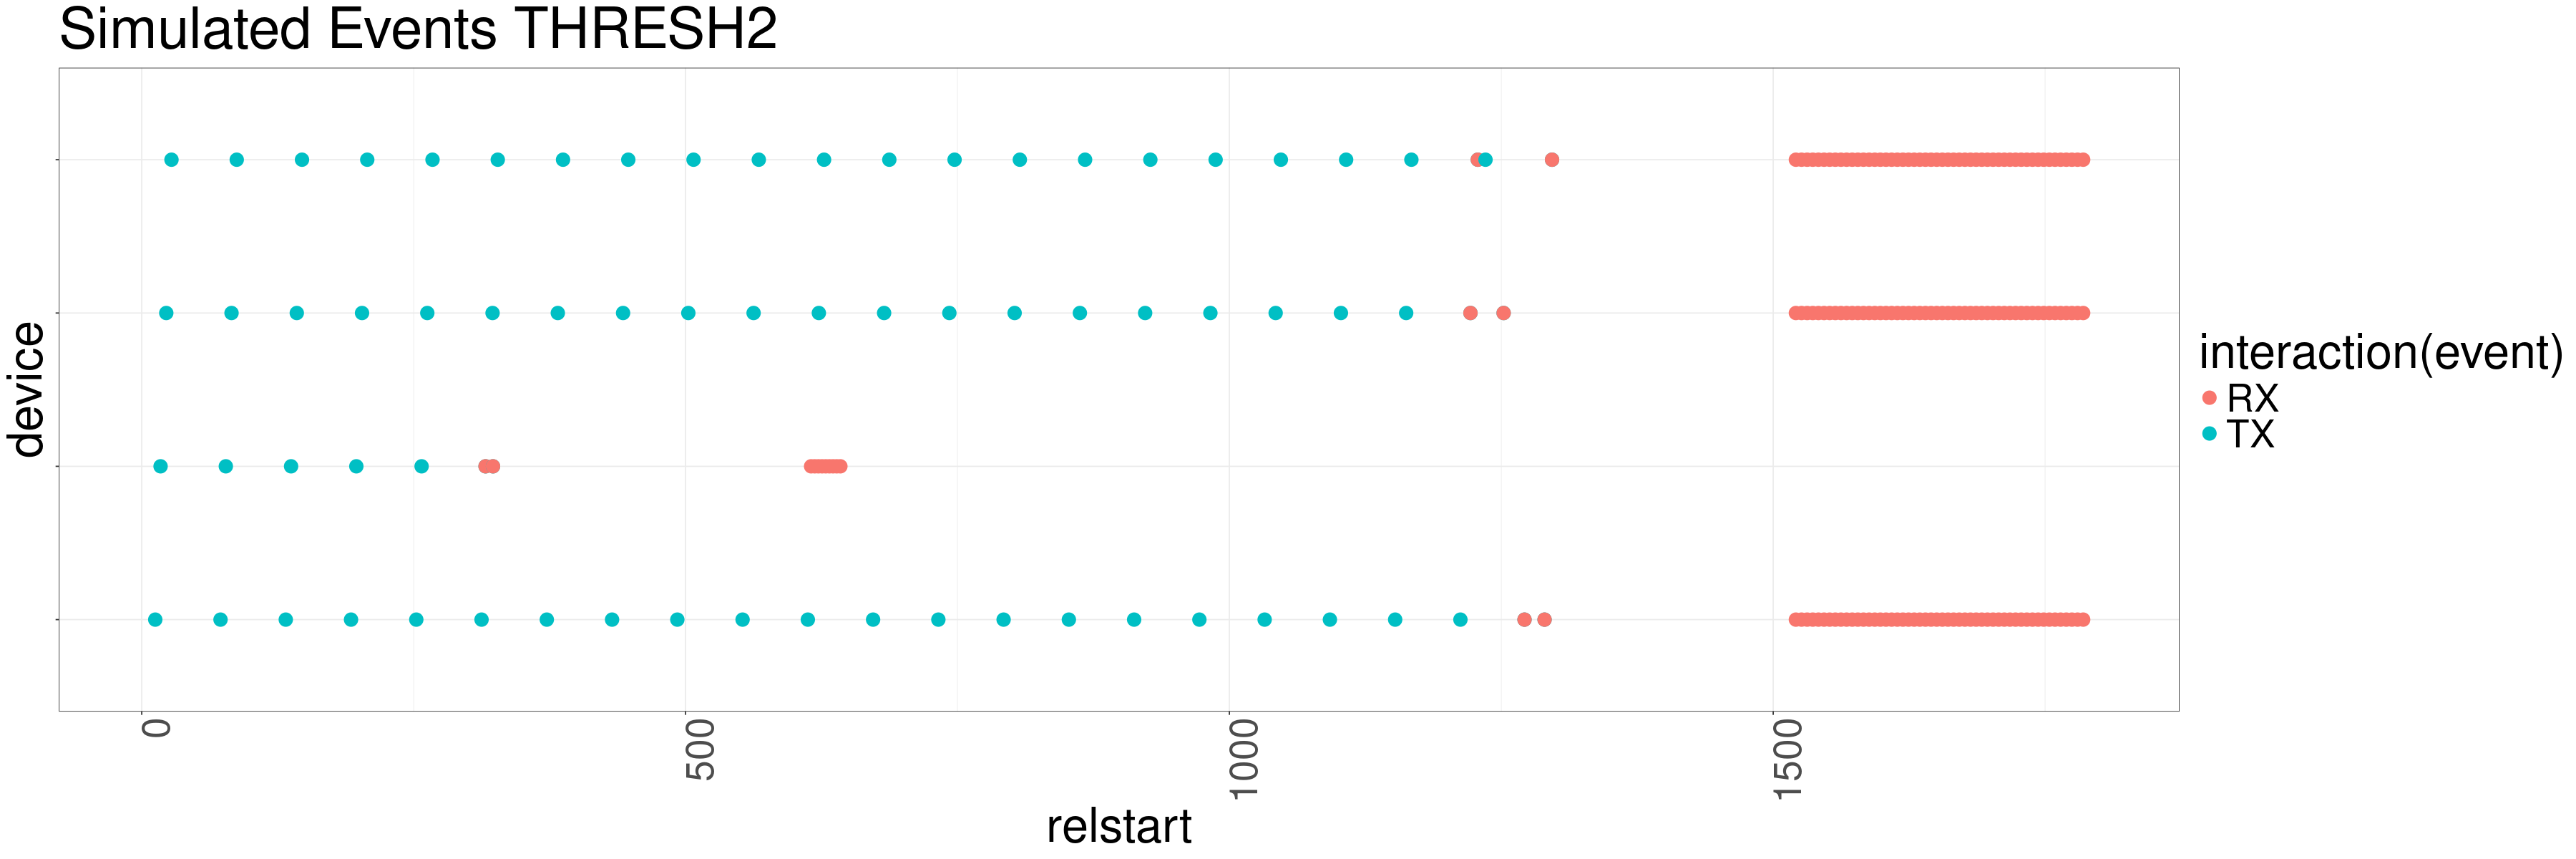

In [38]:
datareal <- read.csv("logs_4ed/4ed_timeonair_real_thresh2.csv", sep = ",") %>% mutate(relstart = end-min(start))

print("Comparison THRESH2")

options(repr.plot.width=30, repr.plot.height=10)

ggplot() + 
    geom_point(data=datareal, aes(x=relstart, y=addr, color=interaction(event)), size=5,alpha=1)+
    theme_bw() +
    theme( text = element_text(size = 40), axis.text.x = element_text(angle = 90, hjust = 1),
         axis.text.y=element_blank())+ 
    ggtitle("Real Events THRESH2") 

datans <- read.csv("logs_4ed/4ed_timeonair_ns.csv", sep = ",") %>% filter(policy=="THRESHOLD2") %>% group_by(DR) %>% mutate(relstart = timestamp)
options(repr.plot.width=30, repr.plot.height=10)

ggplot() + 
    geom_point(data=datans, aes(x=relstart, y=device, color=interaction(event)), size=5,alpha=1)+
    theme_bw() +
    theme( text = element_text(size = 40), axis.text.x = element_text(angle = 90, hjust = 1),
         axis.text.y=element_blank())+ 
    ggtitle("Simulated Events THRESH2") 



[1] "Comparison ALL"


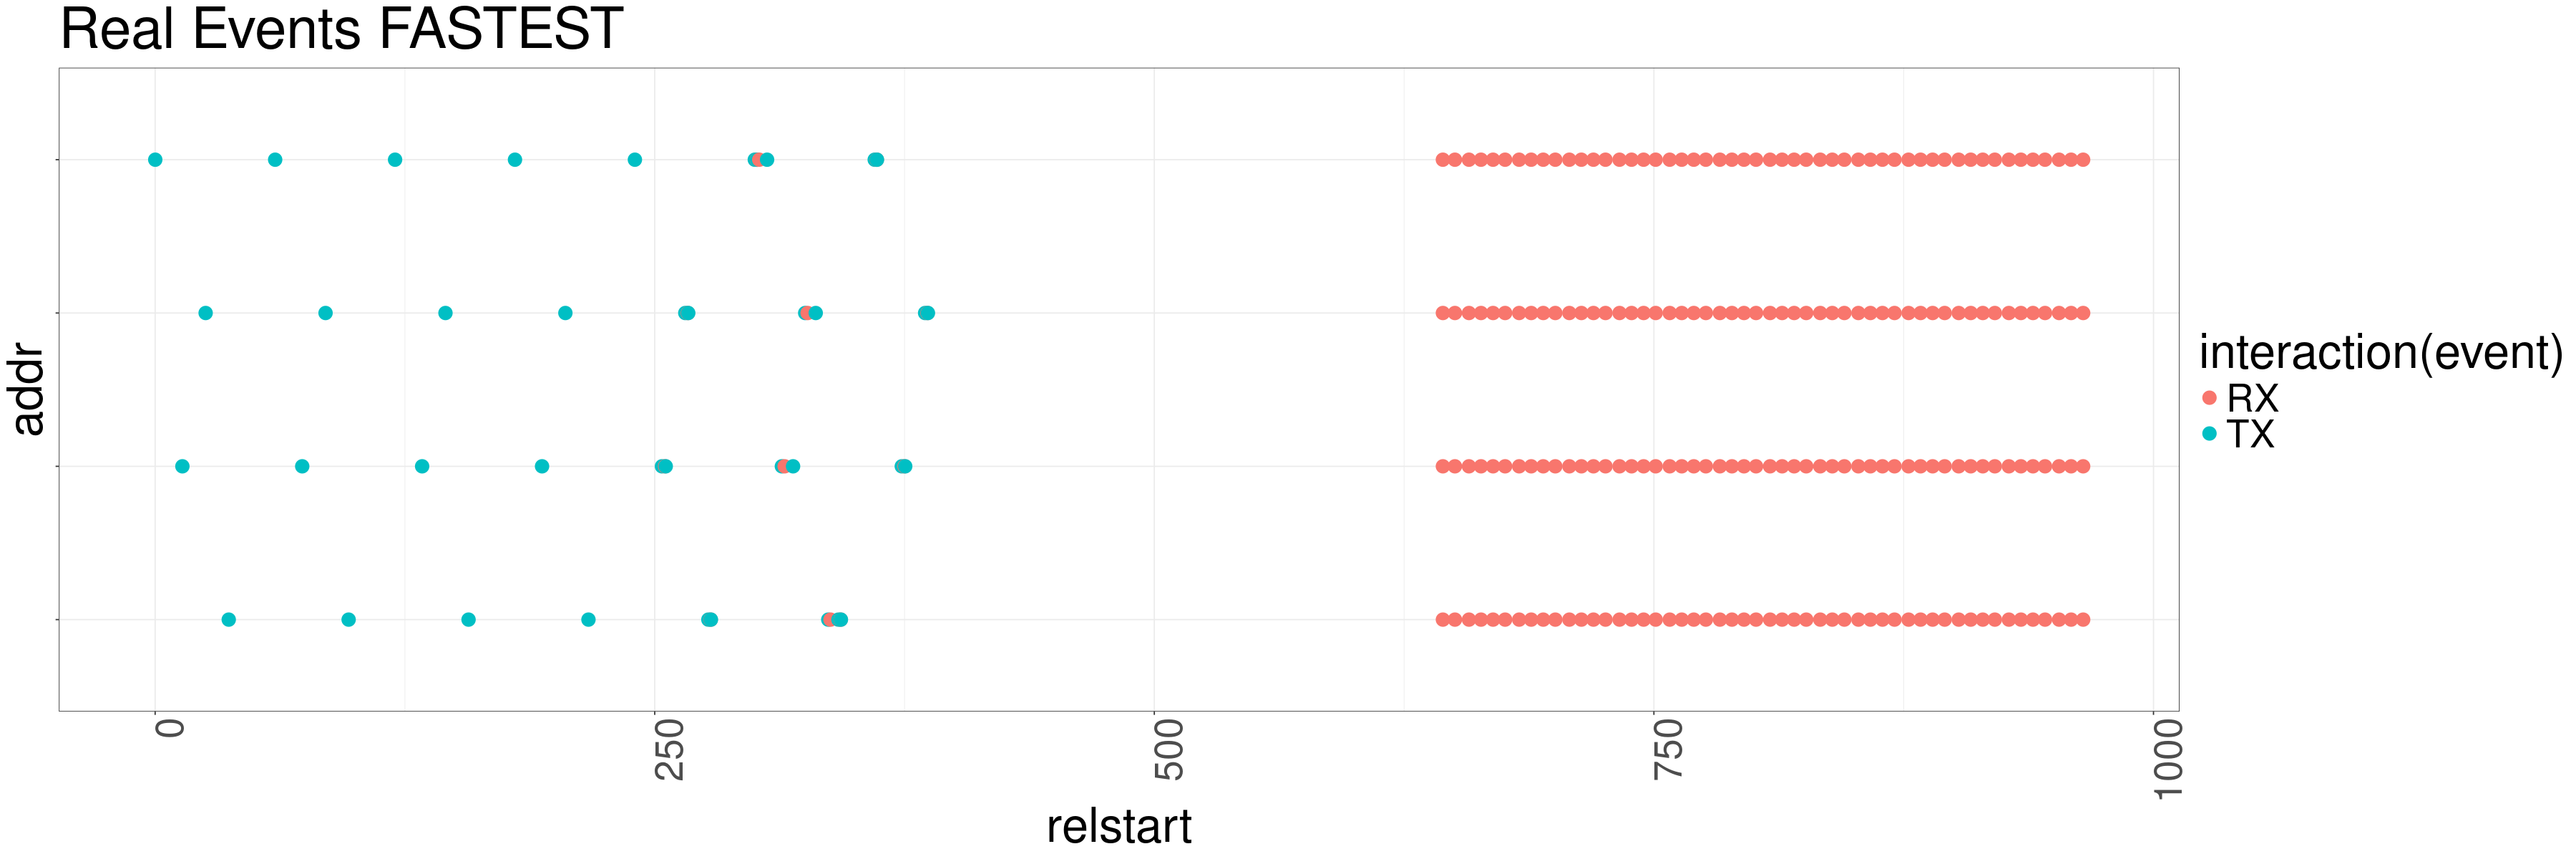

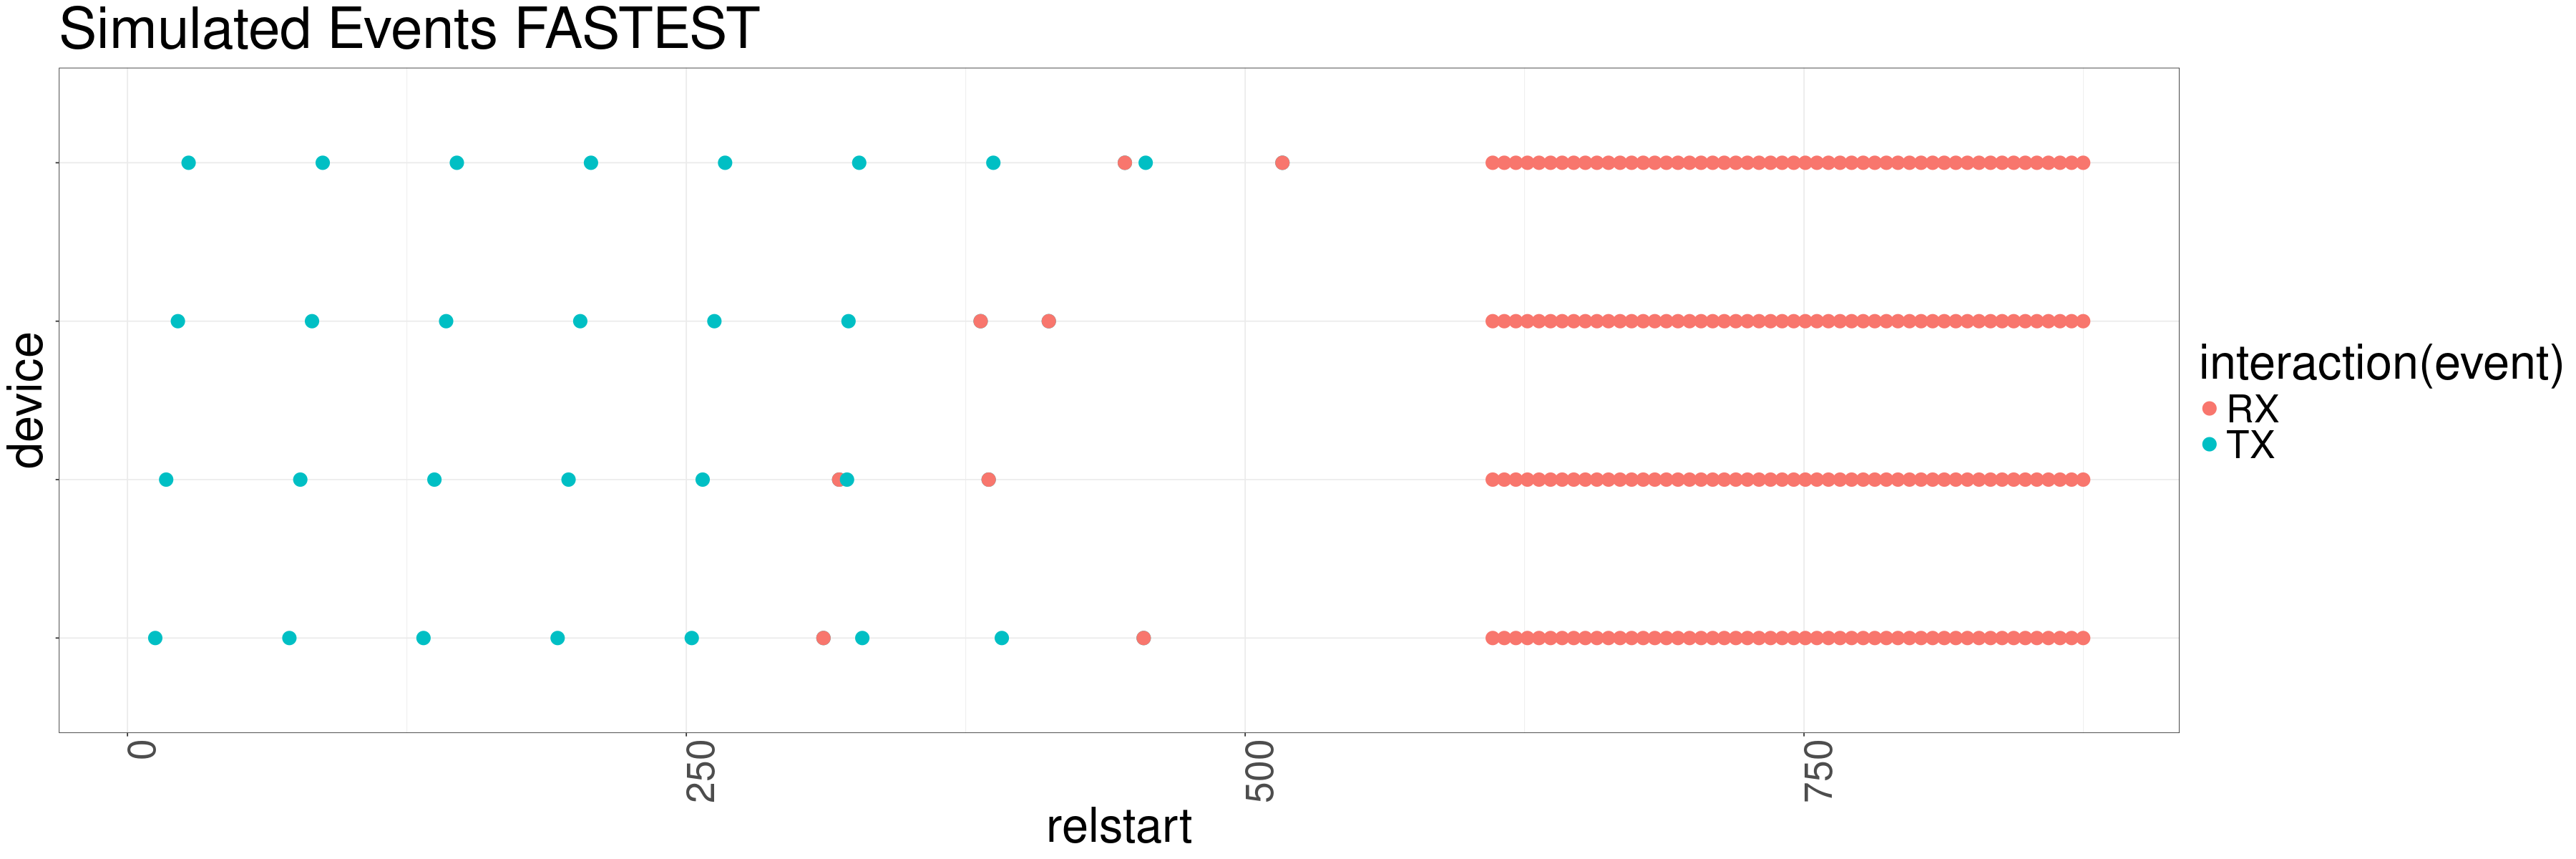

In [40]:
datareal <- read.csv("logs_4ed/4ed_timeonair_real_all.csv", sep = ",") %>% mutate(relstart = end-min(start))

print("Comparison ALL")

options(repr.plot.width=30, repr.plot.height=10)

ggplot() + 
    geom_point(data=datareal, aes(x=relstart, y=addr, color=interaction(event)), size=5,alpha=1)+
    theme_bw() +
    theme( text = element_text(size = 40), axis.text.x = element_text(angle = 90, hjust = 1),
         axis.text.y=element_blank())+ 
    ggtitle("Real Events FASTEST") 

datans <- read.csv("logs_4ed/4ed_timeonair_ns.csv", sep = ",") %>% filter(policy=="ALL") %>% group_by(DR) %>% mutate(relstart = timestamp)
options(repr.plot.width=30, repr.plot.height=10)

ggplot() + 
    geom_point(data=datans, aes(x=relstart, y=device, color=interaction(event)), size=5,alpha=1)+
    theme_bw() +
    theme( text = element_text(size = 40), axis.text.x = element_text(angle = 90, hjust = 1),
         axis.text.y=element_blank())+ 
    ggtitle("Simulated Events FASTEST") 



[1] "Comparison NAIVE"


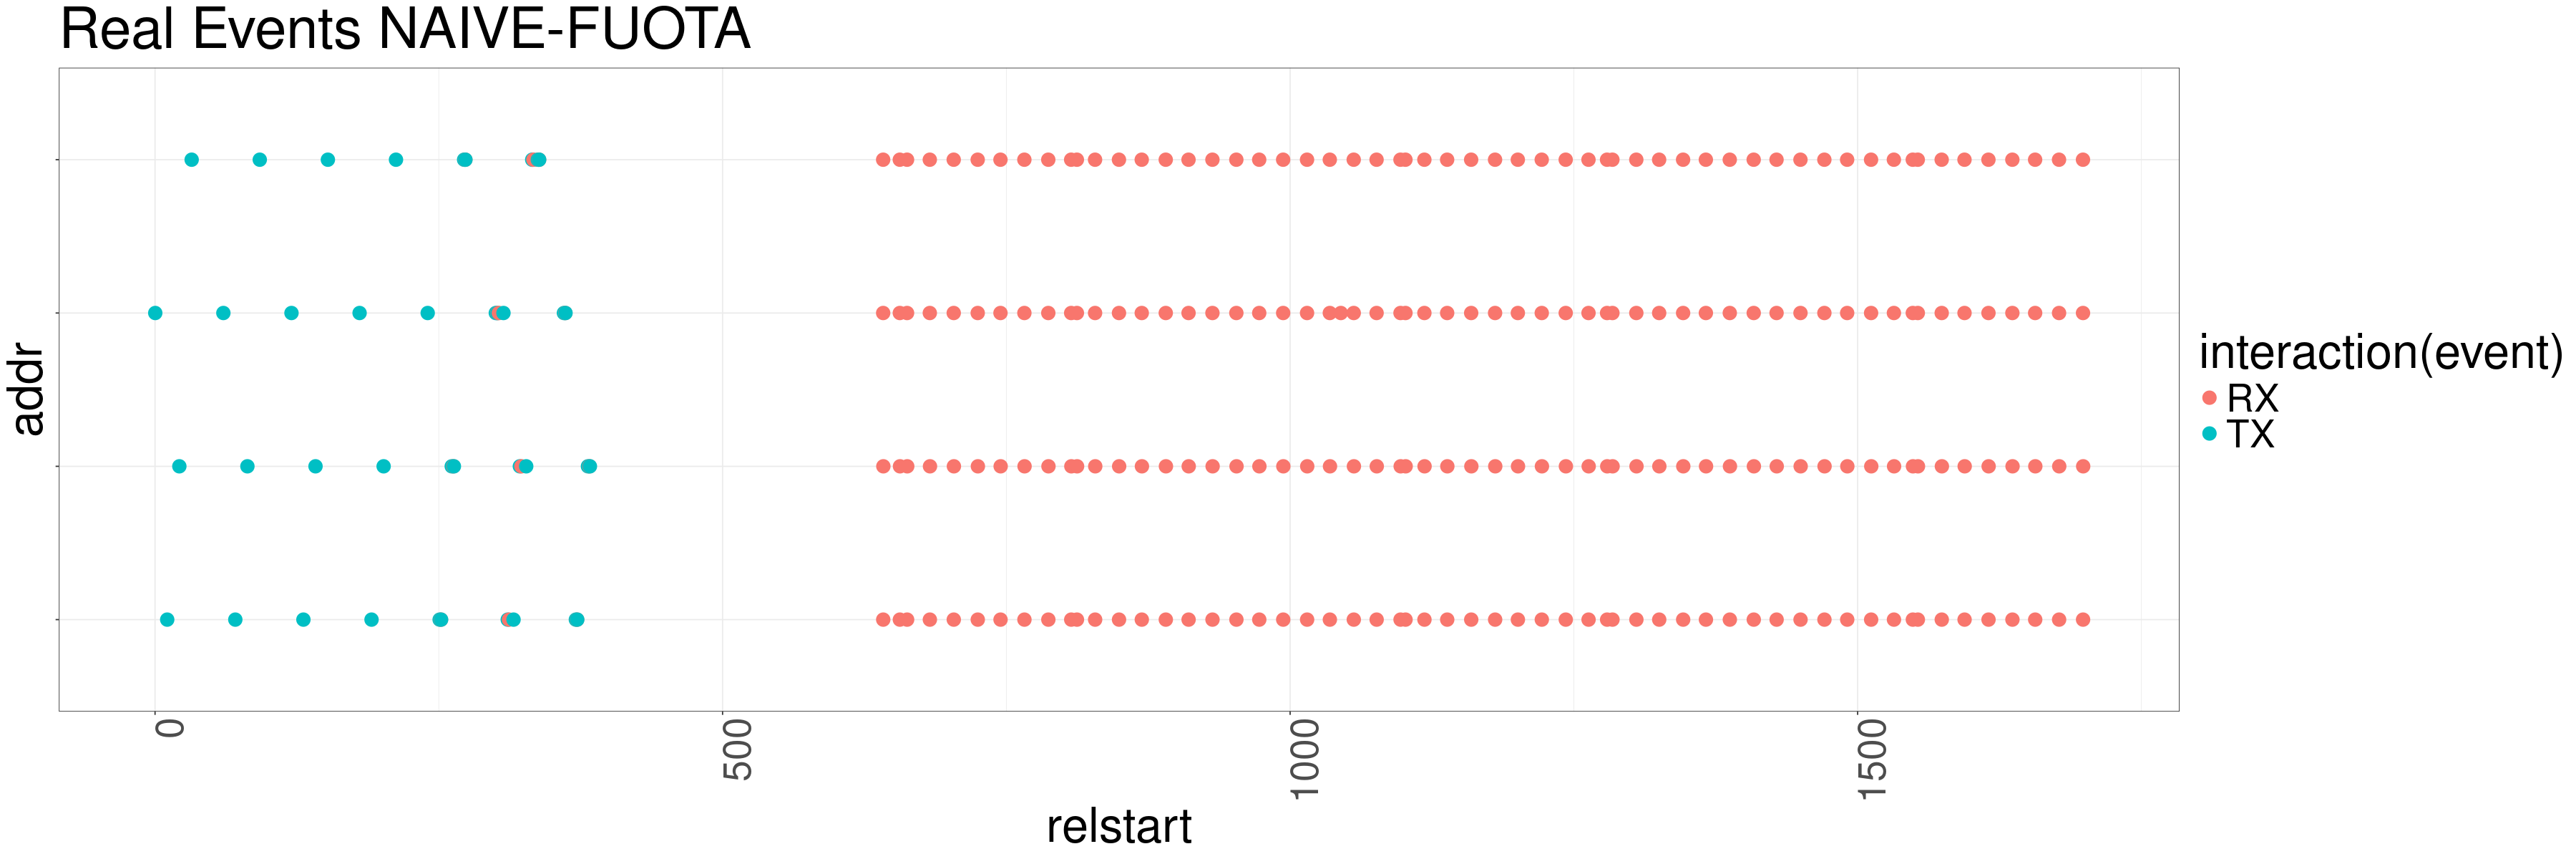

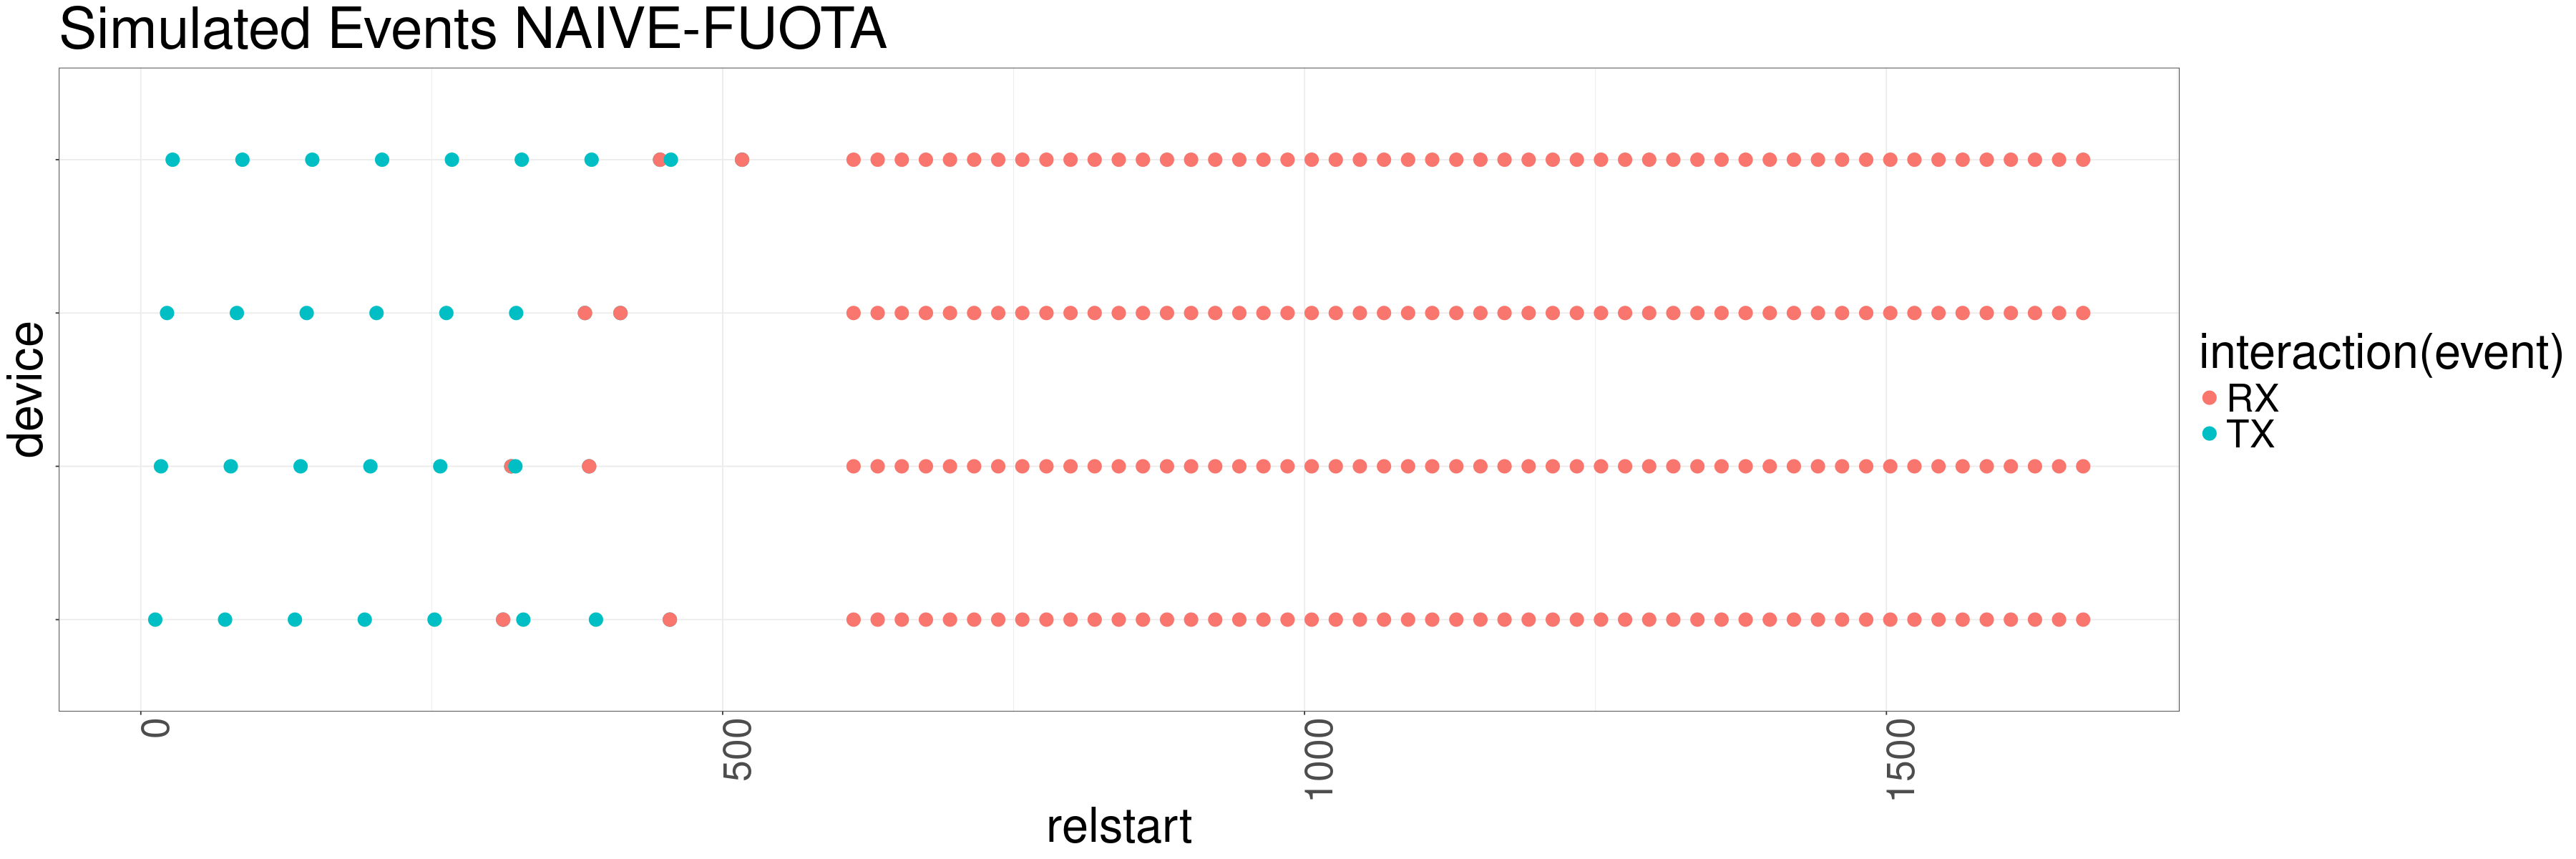

In [41]:
datareal <- read.csv("logs_4ed/4ed_timeonair_real_naive.csv", sep = ",") %>% mutate(relstart = end-min(start))

print("Comparison NAIVE")

options(repr.plot.width=30, repr.plot.height=10)

ggplot() + 
    geom_point(data=datareal, aes(x=relstart, y=addr, color=interaction(event)), size=5,alpha=1)+
    theme_bw() +
    theme( text = element_text(size = 40), axis.text.x = element_text(angle = 90, hjust = 1),
         axis.text.y=element_blank())+ 
    ggtitle("Real Events NAIVE-FUOTA") 

datans <- read.csv("logs_4ed/4ed_timeonair_ns.csv", sep = ",") %>% filter(policy=="BASELINE") %>% group_by(DR) %>% mutate(relstart = timestamp)
options(repr.plot.width=30, repr.plot.height=10)

ggplot() + 
    geom_point(data=datans, aes(x=relstart, y=device, color=interaction(event)), size=5,alpha=1)+
    theme_bw() +
    theme( text = element_text(size = 40), axis.text.x = element_text(angle = 90, hjust = 1),
         axis.text.y=element_blank())+ 
    ggtitle("Simulated Events NAIVE-FUOTA") 


[1] "Comparison THRESHOLD3"


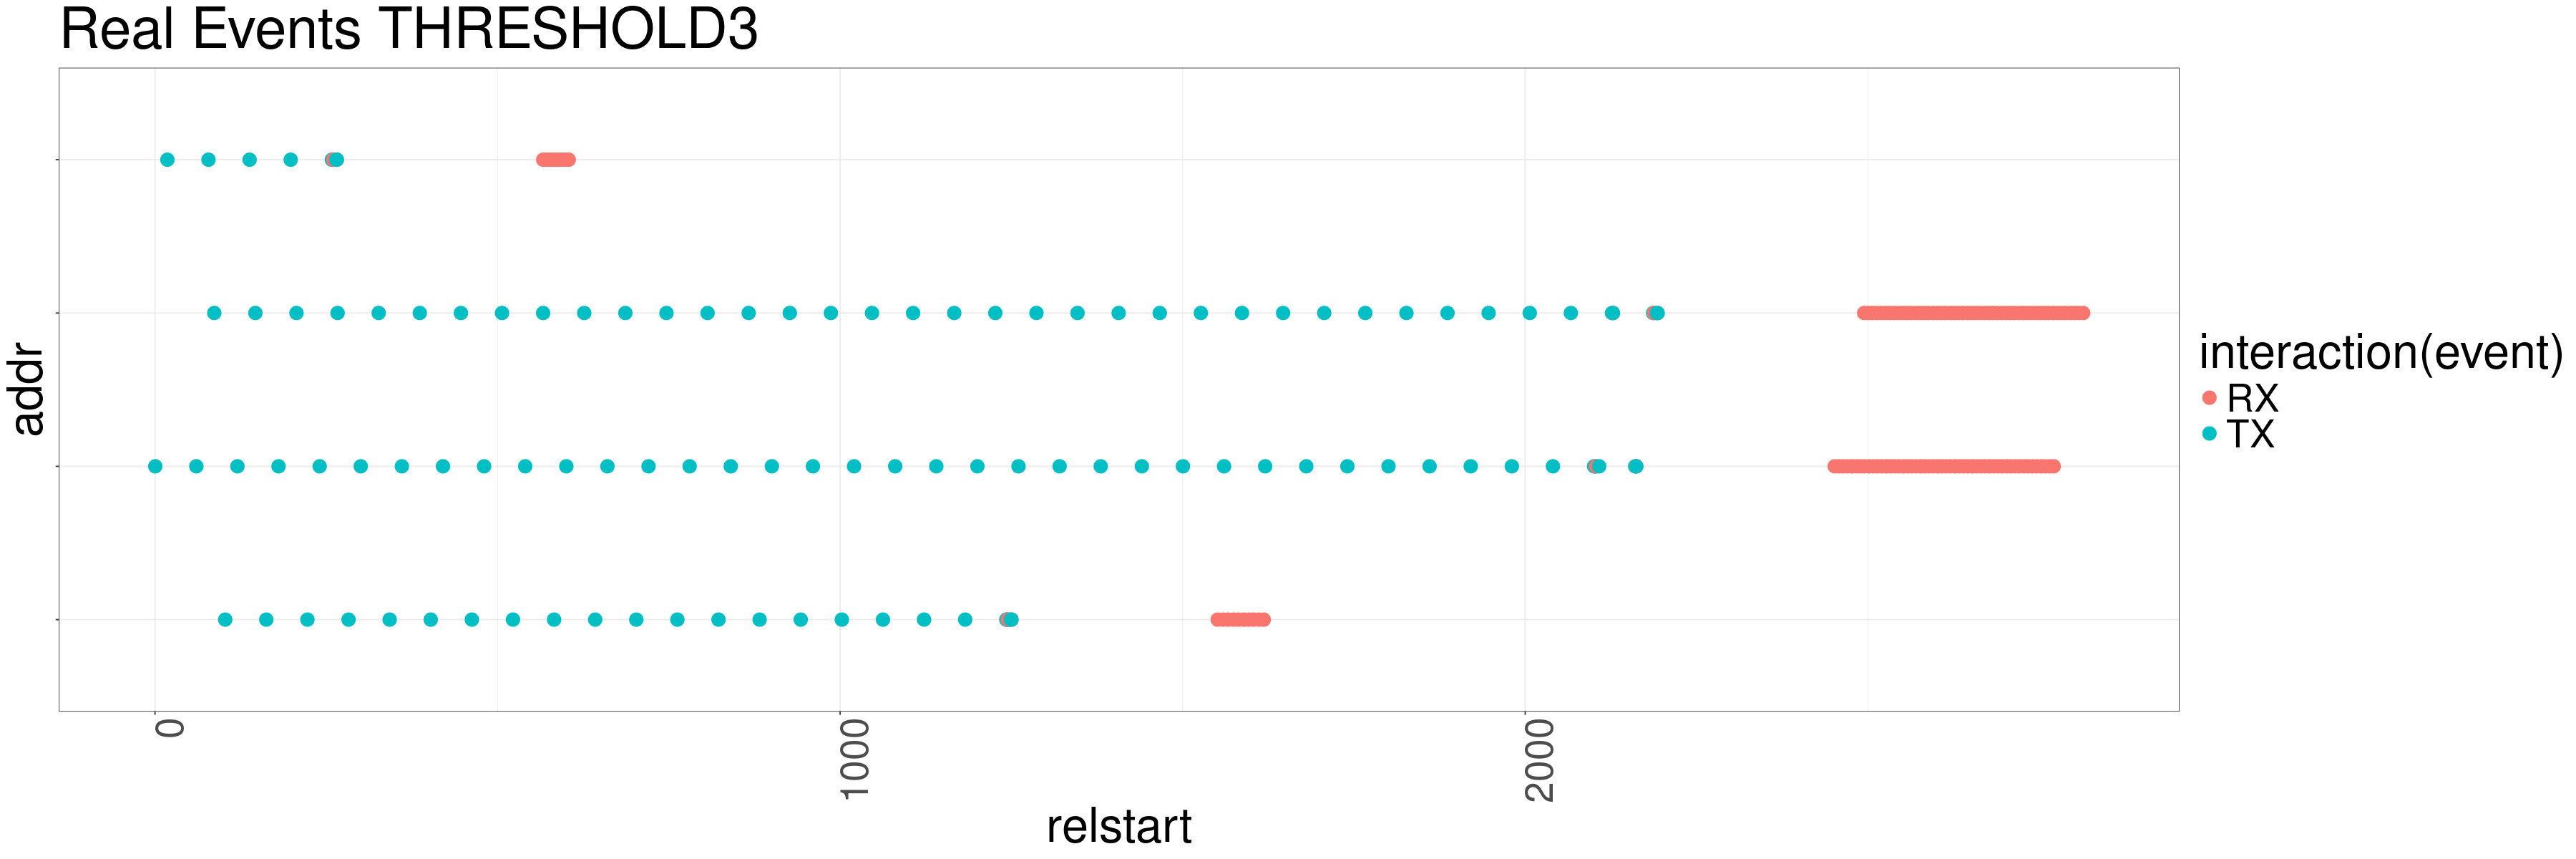

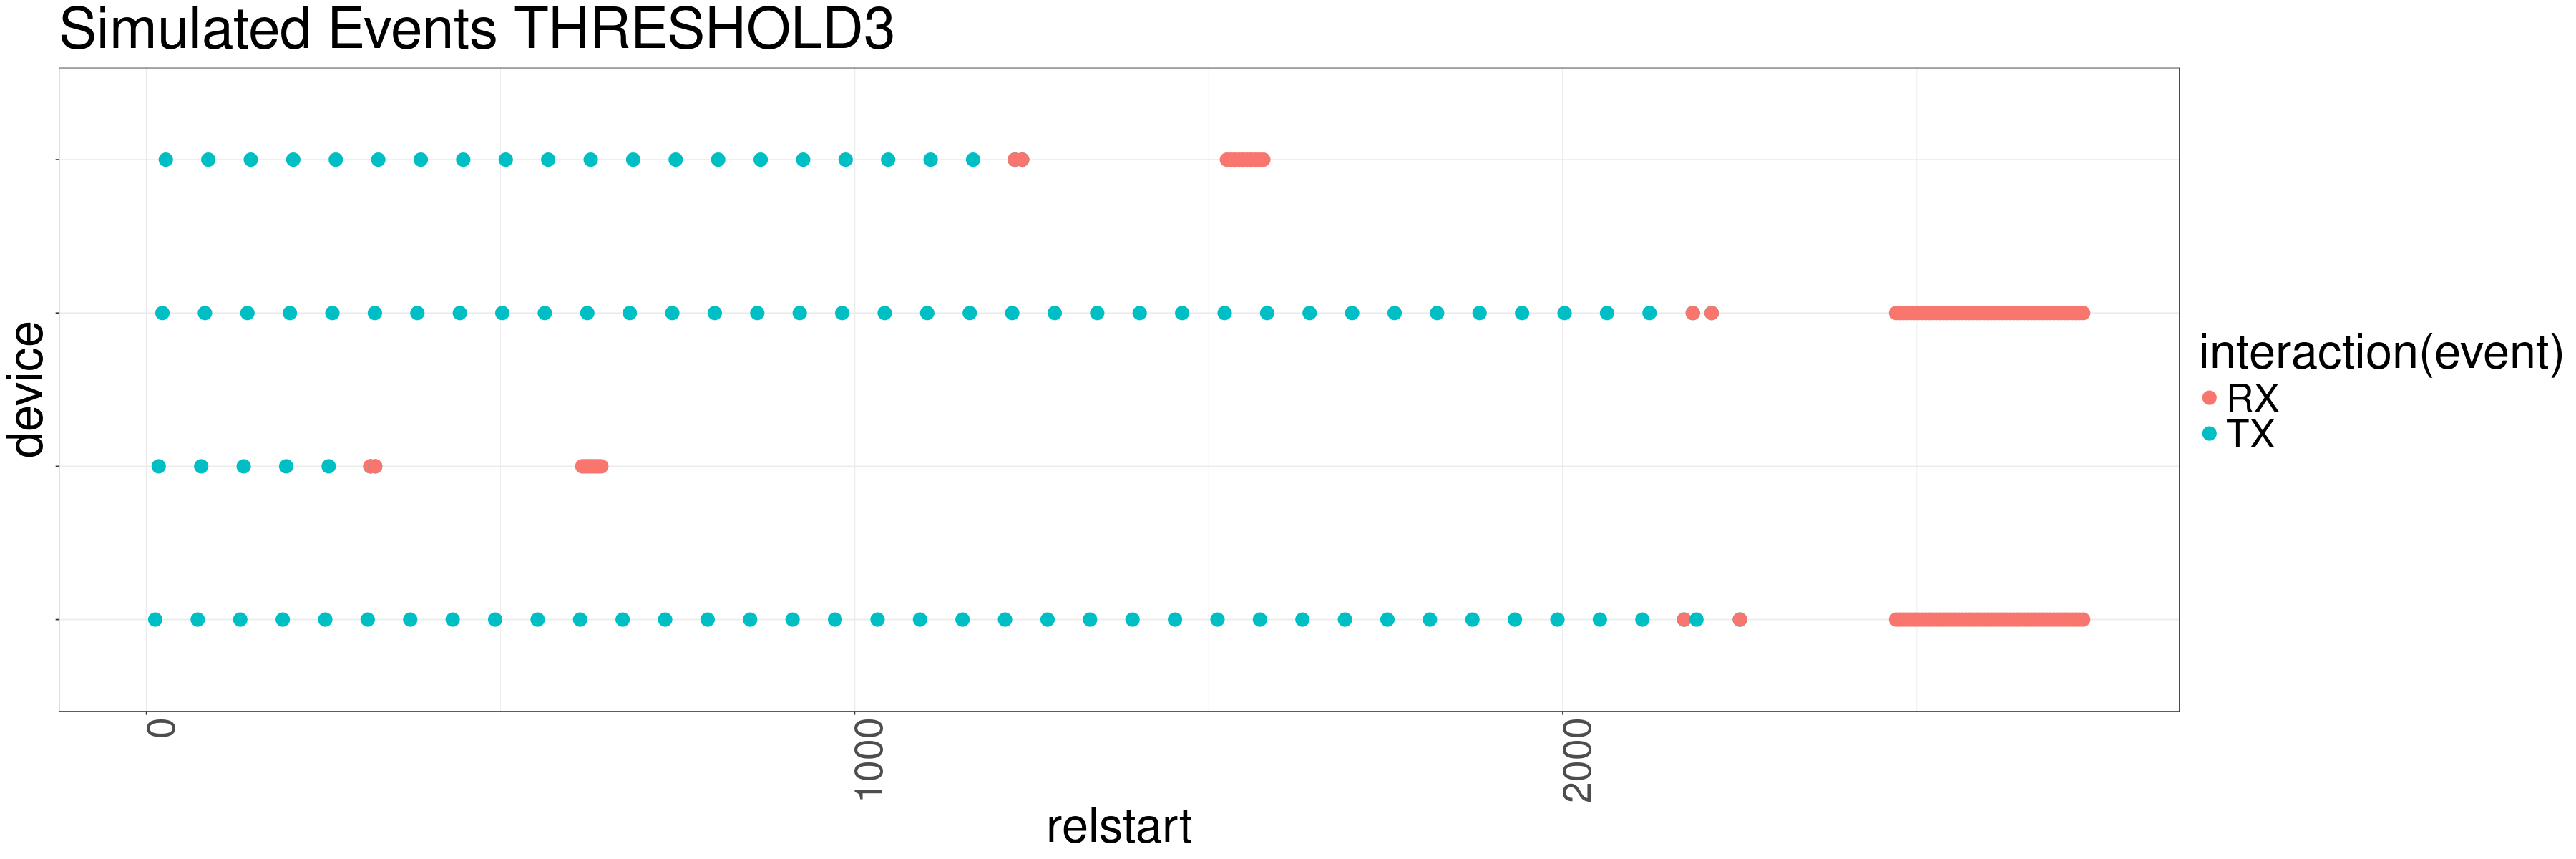

In [44]:
datareal <- read.csv("logs_4ed/4ed_timeonair_real_thresh3.csv", sep = ",") %>% mutate(relstart = end-min(start))

print("Comparison THRESHOLD3")

options(repr.plot.width=30, repr.plot.height=10)

ggplot() + 
    geom_point(data=datareal, aes(x=relstart, y=addr, color=interaction(event)), size=5,alpha=1)+
    theme_bw() +
    theme( text = element_text(size = 40), axis.text.x = element_text(angle = 90, hjust = 1),
         axis.text.y=element_blank())+ 
    ggtitle("Real Events THRESHOLD3") 

datans <- read.csv("logs_4ed/4ed_timeonair_ns.csv", sep = ",") %>% filter(policy=="THRESHOLD3") %>% group_by(DR) %>% mutate(relstart = timestamp)
options(repr.plot.width=30, repr.plot.height=10)

ggplot() + 
    geom_point(data=datans, aes(x=relstart, y=device, color=interaction(event)), size=5,alpha=1)+
    theme_bw() +
    theme( text = element_text(size = 40), axis.text.x = element_text(angle = 90, hjust = 1),
         axis.text.y=element_blank())+ 
    ggtitle("Simulated Events THRESHOLD3") 
